<a href="https://colab.research.google.com/github/TriniteeHayes/MDD-SexSpecific-Transcriptomics-Project/blob/main/MDD_01_data_download.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install GEOparse


In [2]:
!pip install GEOparse


In [3]:
from GEOparse import get_GEO
gse = get_GEO("GSE98793")


03-Dec-2025 18:49:27 DEBUG utils - Directory ./ already exists. Skipping.
DEBUG:GEOparse:Directory ./ already exists. Skipping.
03-Dec-2025 18:49:27 INFO GEOparse - Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE98nnn/GSE98793/soft/GSE98793_family.soft.gz to ./GSE98793_family.soft.gz
INFO:GEOparse:Downloading ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE98nnn/GSE98793/soft/GSE98793_family.soft.gz to ./GSE98793_family.soft.gz
100%|██████████| 104M/104M [00:01<00:00, 59.3MB/s] 
03-Dec-2025 18:49:30 DEBUG downloader - Size validation passed
DEBUG:GEOparse:Size validation passed
03-Dec-2025 18:49:30 DEBUG downloader - Moving /tmp/tmpo56zzaug to /content/GSE98793_family.soft.gz
DEBUG:GEOparse:Moving /tmp/tmpo56zzaug to /content/GSE98793_family.soft.gz
03-Dec-2025 18:49:30 DEBUG downloader - Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE98nnn/GSE98793/soft/GSE98793_family.soft.gz
DEBUG:GEOparse:Successfully downloaded ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE98nnn/GSE987

In [4]:
import pandas as pd

meta_rows = []
for gsm_name, gsm in gse.gsms.items():
    md = gsm.metadata
    meta_rows.append({
        "sample": gsm_name,
        "sex": md.get("gender:ch1", [""])[0] if "gender:ch1" in md else "",
        "diagnosis": md.get("phenotype:ch1", [""])[0] if "phenotype:ch1" in md else ""
    })
meta = pd.DataFrame(meta_rows).set_index("sample")
meta.head()


,sex,diagnosis
sample,,
GSM2612096,,
GSM2612097,,
GSM2612098,,
GSM2612099,,
GSM2612100,,


In [5]:
gsm_name, gsm = next(iter(gse.gsms.items()))
gsm.metadata.keys()


dict_keys(['title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'taxid_ch1', 'characteristics_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol', 'description', 'data_processing', 'platform_id', 'contact_name', 'contact_email', 'contact_laboratory', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_zip/postal_code', 'contact_country', 'supplementary_file', 'series_id', 'data_row_count'])

In [6]:
gsm.metadata


{'title': ['whole_blood_control_1'],
 'geo_accession': ['GSM2612096'],
 'status': ['Public on May 12 2017'],
 'submission_date': ['May 11 2017'],
 'last_update_date': ['Jan 23 2018'],
 'type': ['RNA'],
 'channel_count': ['1'],
 'source_name_ch1': ['whole_blood_control'],
 'organism_ch1': ['Homo sapiens'],
 'taxid_ch1': ['9606'],
 'characteristics_ch1': ['subject group: CNTL; healthy control',
  'anxiety: no',
  'gender: M',
  'age: 35.8',
  'tissue: whole blood',
  'batch: 1'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['RNA was isolated from all samples using the standard PAXgene protocol on the Qiagen Biorobot 8000.'],
 'label_ch1': ['biotin'],
 'label_protocol_ch1': ['standard Affymetrix protocol'],
 'hyb_protocol': ['standard Affymetrix protocol'],
 'scan_protocol': ['Arrays were scanned on a GeneChip Scanner 3000 and fluorescence intensity for each feature of the array was obtained by using GeneChip® Operating Software (Affymetrix, Santa Clara, CA, USA).  Arrays wer

In [7]:
gsm_name, gsm = next(iter(gse.gsms.items()))
gsm.metadata.keys()


dict_keys(['title', 'geo_accession', 'status', 'submission_date', 'last_update_date', 'type', 'channel_count', 'source_name_ch1', 'organism_ch1', 'taxid_ch1', 'characteristics_ch1', 'molecule_ch1', 'extract_protocol_ch1', 'label_ch1', 'label_protocol_ch1', 'hyb_protocol', 'scan_protocol', 'description', 'data_processing', 'platform_id', 'contact_name', 'contact_email', 'contact_laboratory', 'contact_department', 'contact_institute', 'contact_address', 'contact_city', 'contact_zip/postal_code', 'contact_country', 'supplementary_file', 'series_id', 'data_row_count'])

In [8]:
for k, v in gsm.metadata.items():
    print(k, ":", v)


title : ['whole_blood_control_1']
geo_accession : ['GSM2612096']
status : ['Public on May 12 2017']
submission_date : ['May 11 2017']
last_update_date : ['Jan 23 2018']
type : ['RNA']
channel_count : ['1']
source_name_ch1 : ['whole_blood_control']
organism_ch1 : ['Homo sapiens']
taxid_ch1 : ['9606']
characteristics_ch1 : ['subject group: CNTL; healthy control', 'anxiety: no', 'gender: M', 'age: 35.8', 'tissue: whole blood', 'batch: 1']
molecule_ch1 : ['total RNA']
extract_protocol_ch1 : ['RNA was isolated from all samples using the standard PAXgene protocol on the Qiagen Biorobot 8000.']
label_ch1 : ['biotin']
label_protocol_ch1 : ['standard Affymetrix protocol']
hyb_protocol : ['standard Affymetrix protocol']
scan_protocol : ['Arrays were scanned on a GeneChip Scanner 3000 and fluorescence intensity for each feature of the array was obtained by using GeneChip® Operating Software (Affymetrix, Santa Clara, CA, USA).  Arrays were scanned on a GeneChip Scanner 3000 and fluorescence intens

In [9]:
import pandas as pd

def get_char(md, key_substring):
    """
    Look in characteristics_ch1 entries and return the text after 'key:'.
    Example: key_substring='gender' → 'M'
             key_substring='subject group' → 'CNTL'
    """
    for item in md.get("characteristics_ch1", []):
        low = item.lower()
        if key_substring in low:
            # split at the first ':' and then cut off at the first ';'
            parts = item.split(":", 1)
            if len(parts) == 2:
                after_colon = parts[1]
                # sometimes there's ';' after value
                val = after_colon.split(";")[0].strip()
                return val
    return ""


In [10]:
meta_rows = []
for gsm_name, gsm in gse.gsms.items():
    md = gsm.metadata
    meta_rows.append({
        "sample": gsm_name,
        "sex": get_char(md, "gender"),
        "diagnosis": get_char(md, "subject group"),
    })

meta = pd.DataFrame(meta_rows).set_index("sample")
meta.head()


,sex,diagnosis
sample,,
GSM2612096,M,CNTL
GSM2612097,F,CNTL
GSM2612098,F,CNTL
GSM2612099,F,CNTL
GSM2612100,M,CNTL


In [11]:
# normalize sex
meta["sex"] = meta["sex"].str.upper().str.strip()
meta["sex"] = meta["sex"].map({"M": "male", "F": "female"}).fillna(meta["sex"])

# normalize diagnosis
meta["diagnosis"] = meta["diagnosis"].str.upper().str.strip()
meta["diagnosis"] = meta["diagnosis"].map({"CNTL": "control", "MDD": "mdd"}).fillna(meta["diagnosis"])

print(meta["sex"].value_counts())
print(meta["diagnosis"].value_counts())
print(pd.crosstab(meta["sex"], meta["diagnosis"]))


sex
female    144
male       48
Name: count, dtype: int64
diagnosis
CASE       128
control     64
Name: count, dtype: int64
diagnosis  CASE  control
sex                     
female       96       48
male         32       16


In [12]:
meta["diagnosis"] = meta["diagnosis"].str.upper().str.strip()
meta["diagnosis"] = meta["diagnosis"].replace({
    "CASE": "mdd",
    "MDD": "mdd",
    "CNTL": "control",
    "CONTROL": "control"
})


In [13]:
print(meta["diagnosis"].value_counts())
print(pd.crosstab(meta["sex"], meta["diagnosis"]))



diagnosis
mdd        128
control     64
Name: count, dtype: int64
diagnosis  control  mdd
sex                    
female          48   96
male            16   32


In [14]:
# extract expression table
expr = gse.pivot_samples("VALUE").astype(float)

expr = expr.T  # transpose so rows = samples, columns = probes/genes

print(expr.shape)
expr.head()


(192, 54675)


ID_REF,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,...,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at
name,,,,,,,,,,,,,,,,,,,,,
GSM2612096,5.850755,7.092003,9.373934,5.814709,2.728267,7.759279,5.471557,4.789368,9.237893,3.525548,...,2.962237,10.971878,11.232722,11.314003,11.575086,11.514398,13.123345,12.936158,14.189331,13.991847
GSM2612097,5.577231,6.618856,9.315652,5.643282,2.671652,7.580082,5.946168,4.803316,8.791764,3.406293,...,3.414959,11.029518,11.204662,11.312054,11.514805,11.714836,13.098973,13.105714,14.201549,14.074253
GSM2612098,5.663056,6.487570,8.237757,5.363979,2.206741,7.040423,5.739707,4.612934,9.519764,3.181881,...,2.992093,10.826100,11.067723,11.182784,11.353895,11.351371,13.459877,13.078201,14.245318,14.131001
GSM2612099,5.596154,6.565388,8.877479,5.340978,2.998085,7.311486,5.828200,4.702126,9.410308,3.522420,...,2.741359,10.836074,11.034449,11.325967,11.398418,11.414534,13.358833,13.026978,14.245318,14.085953
GSM2612100,5.242699,6.531346,8.148008,5.701092,2.594565,6.879163,5.675944,4.979393,9.019369,3.645697,...,3.556644,10.903756,11.029261,11.253544,11.467698,11.487514,13.226250,12.878946,14.224319,14.002432


In [15]:
print(expr.shape)


(192, 54675)


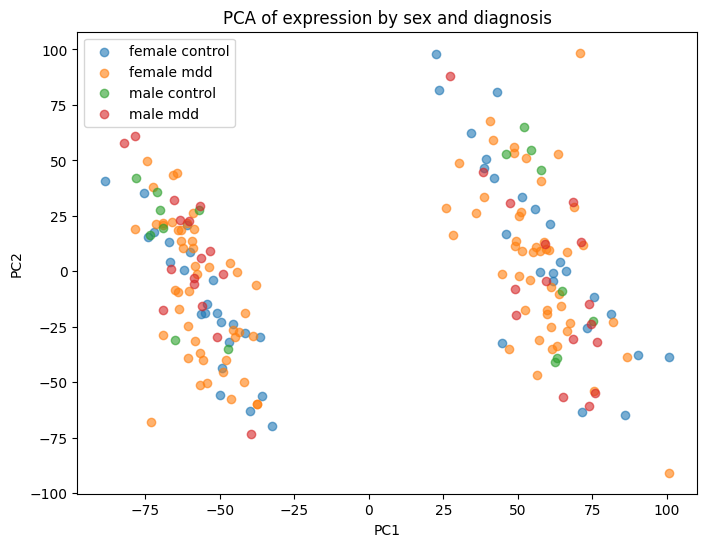

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Match ordering of rows between expr and metadata
expr_use = expr.loc[meta.index]

# Run PCA
pca = PCA(n_components=2)
pca_res = pca.fit_transform(expr_use)

meta["PC1"] = pca_res[:,0]
meta["PC2"] = pca_res[:,1]

# Color by BOTH sex & diagnosis
plt.figure(figsize=(8,6))
for sex in ["female", "male"]:
    for dx in ["control", "mdd"]:
        subset = meta[(meta["sex"] == sex) & (meta["diagnosis"] == dx)]
        plt.scatter(subset["PC1"], subset["PC2"], label=f"{sex} {dx}", alpha=0.6)

plt.legend()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA of expression by sex and diagnosis")
plt.show()
